<a href="https://colab.research.google.com/github/maiormarso/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/DS8_Unit_1_Sprint_Challenge_3_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 3

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 is a variable that indicates whether or not a person's request for credit has been approved or denied. This is a good candidate for a y variable since we might want to use the other features to predict this one. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

Hint: If a column has the datatype of "object" even though it's made up of float or integer values, you can coerce it to act as a numeric column by using the `pd.to_numeric()` function.

My hypothosis for this M & F and Credit Approval Column,

I was under the impression that F would have more credit approval.

But the statics, mostly the graphics proved otherwise.

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats

In [0]:

column_headers = ['A1','12','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14','A15','A16']

df=pd.read_csv('crx.csv', names=column_headers,na_values='?')


In [3]:
df.shape

(690, 16)

In [4]:
df.head()

,A1,12,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+


In [5]:
df.shape


(690, 16)

In [6]:
df.isnull().sum()

A1     12
12     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

In [7]:
df.dtypes

A1      object
12     float64
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14    float64
A15      int64
A16     object
dtype: object

In [8]:
df.A15 = df.A15.astype(float)
df.head()

,A1,12,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0.0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560.0,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824.0,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3.0,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0.0,+


In [0]:
# df=df['A16'].replace({'+': 1,'-': 0})
# df['A16']np.replace('+'': 1)
# df1=df.A16.map(dict('+'+:1, 0))
# df1=df['A16'].replace('+', 1)(inplace=True)
df['A16'].replace('+','1',inplace=True)

In [10]:
df.head(1)

,A1,12,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.0,u,g,w,v,1.25,t,t,1,f,g,202.0,0.0,1


In [11]:
df.shape

(690, 16)

In [0]:
df['A16'].replace('+','0',inplace=True)

In [0]:
df['A16'].replace('-','0',inplace=True)

In [0]:
df['A1'].replace('a','1',inplace=True)

In [0]:
df['A1'].replace('b','0',inplace=True)

In [16]:
df.head(1)

,A1,12,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,0,30.83,0.0,u,g,w,v,1.25,t,t,1,f,g,202.0,0.0,1


In [17]:
df.shape

(690, 16)

## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

###Select columns of interest:
- A1 and A16 
- A1 = M or F  
- A16 = Approved or Disapproved.

In [0]:
df2=df[['A1','A16']]

In [19]:
df2.head(500)

,A1,A16
0,0,1
1,1,1
2,1,1
3,0,1
4,0,1
5,0,1
6,0,1
7,1,1
8,0,1
9,0,1


In [20]:
df.shape

(690, 16)

Remove the Credit Disapparval Rows

In [0]:
df2 = df2[df.A16 != '0']

In [22]:
df2.head(200)

,A1,A16
0,0,1
1,1,1
2,1,1
3,0,1
4,0,1
5,0,1
6,0,1
7,1,1
8,0,1
9,0,1


In [23]:
df.shape

(690, 16)

Dropped the Credit Approval Column

now we have the M and F credit approve column

In [0]:
df2=df2.drop(columns=['A16'])

In [25]:
df2.head()

,A1
0,0
1,1
2,1
3,0
4,0


###Selected Appoved M or F

In [26]:
df2.sum()

Series([], dtype: float64)

In [27]:
df2.shape


(307, 1)

In [28]:
500-272

228

In [29]:
import numpy as np
df2= np.random.binomial(n=1, p=.5, size=500)
print(np.std(df2, ddof=1))
print(df2)

0.4981891054303969
[0 1 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 0 1 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0
 0 0 1 1 1 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 0 0 1 1
 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 1 0 0 0 1
 1 1 1 0 0 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 1 1 1 0 0 1 1 1 0 1 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0
 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 0 1 0 0 0 0 1 0 0
 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1 0 1 0
 1 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 1 0 0 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 0 0
 0 0 0 1 1 0 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 1 1 1 0 1 0 1 0 0 1 1 0
 0 0 1 0 1 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 0 0 0 1 0 1 0 1 1 1 1 0 1 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 0 1 0 1 0 0
 0 0 0 1 1 0 1 1 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 1 1 0 0
 0 0 1

In [0]:
import scipy.stats as stats
def confidence_interval(data, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  #stderr = stats.sem(data)
  stderr = np.std(data, ddof=1) / np.sqrt(n)
  margin_of_error = stderr * stats.t.ppf((1 + confidence) / 2.0, n - 1)
  print(margin_of_error)
  return (mean, mean - margin_of_error, mean + margin_of_error)

In [31]:
df2 = np.random.binomial(n=1, p=.5, size=500)
confidence_interval(df2)

0.04397668345020961


(0.5, 0.4560233165497904, 0.5439766834502096)

In [32]:
df2 = np.random.binomial(n=1, p=.5, size=500)
confidence_interval(df2)

0.04395944121015544


(0.486, 0.44204055878984455, 0.5299594412101554)

In [33]:
df2 = np.random.binomial(n=1, p=.5, size=500)
confidence_interval(df2)

0.04397105407442487


(0.492, 0.44802894592557513, 0.5359710540744249)

Looking at stats.t.ppf

In [34]:
confidence_level = .95
dof =42-1
stats.t.ppf((1 + confidence_level ) / 2, dof)

2.0195409639828936

0.1569828344928344


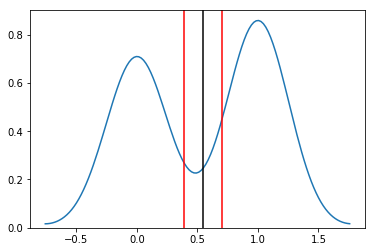

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

df2_100 = np.random.binomial(n=1, p=.5, size=42 )
sns.kdeplot(df2_100)
CI = confidence_interval(df2_100)
plt.axvline(x=CI[1], color='red')
plt.axvline(x=CI[2], color='red')
plt.axvline(x=CI[0], color='k');

Relationship between Confidence Intervals and T-tests Confidence Interval == Bounds of statistical significance for our t-test

A sample mean that falls inside of our confidence interval will "FAIL TO REJECT" our null hypothesis

A sample mean that falls outside of our confidence interval will "REJECT" our null hypothesis

In [0]:
from scipy.stats import t, ttest_1samp

In [37]:
import numpy as np

df2_means = []
for x in range(0,100):
  df2 = np.random.binomial(n=1, p=.5, size=30)
  df2_means.append(df2.mean())

print(df2_means)

[0.4666666666666667, 0.4, 0.6, 0.5, 0.43333333333333335, 0.5666666666666667, 0.43333333333333335, 0.4666666666666667, 0.5, 0.3, 0.43333333333333335, 0.4, 0.6, 0.6, 0.5666666666666667, 0.6333333333333333, 0.36666666666666664, 0.43333333333333335, 0.5333333333333333, 0.6, 0.4666666666666667, 0.4, 0.4, 0.5333333333333333, 0.43333333333333335, 0.4, 0.4, 0.5666666666666667, 0.43333333333333335, 0.3333333333333333, 0.6, 0.5666666666666667, 0.6, 0.4666666666666667, 0.36666666666666664, 0.43333333333333335, 0.6666666666666666, 0.6666666666666666, 0.4, 0.5, 0.5666666666666667, 0.6333333333333333, 0.6, 0.43333333333333335, 0.5333333333333333, 0.4666666666666667, 0.4, 0.5333333333333333, 0.4, 0.43333333333333335, 0.5666666666666667, 0.6333333333333333, 0.6, 0.5666666666666667, 0.4666666666666667, 0.3333333333333333, 0.43333333333333335, 0.43333333333333335, 0.36666666666666664, 0.5333333333333333, 0.5666666666666667, 0.5666666666666667, 0.6, 0.4, 0.6, 0.43333333333333335, 0.5333333333333333, 0.46

In [38]:
# Sample Size
n = len(df2_means)
# Degrees of Freedom
dof = n-1
# The Mean of Means:
mean = np.mean(df2_means)
# Sample Standard Deviation
sample_std = np.std(df2_means, ddof=1)
# Standard Error
std_err = sample_std/n**.5

CI = t.interval(.95, dof, loc=mean, scale=std_err)
print("95% Confidence Interval: ", CI)

95% Confidence Interval:  (0.4791113912578343, 0.5148886087421655)


In [39]:
'''You can roll your own CI calculation pretty easily. 
The only thing that's a little bit challenging 
is understanding the t stat lookup'''

# 95% confidence interval
t_stat = t.ppf(.975, dof)
print("t Statistic:", t_stat)

CI = (mean-(t_stat*std_err), mean+(t_stat*std_err))
print("Confidence Interval", CI)

t Statistic: 1.9842169515086827
Confidence Interval (0.4791113912578343, 0.5148886087421655)


A null hypothesis that's just inside of our confidence interval == fail to reject

In [40]:
ttest_1samp(df2_means, .481453)

Ttest_1sampResult(statistic=1.72448407753429, pvalue=0.08774143616296348)

A null hypothesis that just ouside of our confidence interval == reject*Your words here!*

In [41]:
ttest_1samp(df2_means, .481453)

Ttest_1sampResult(statistic=1.72448407753429, pvalue=0.08774143616296348)

In [42]:
ttest_1samp(df2_means, .481453)

Ttest_1sampResult(statistic=1.72448407753429, pvalue=0.08774143616296348)

##Run a chi2 Test 'by hand' (Using Numpy)
χ2=∑(observedij−expetedi)2(expectedi)

##Run a $chi^ {2}$ Test 'by hand' (Using Numpy)

\begin{align}
\chi^2 = \sum \frac{(observed_{ij}-expeted_{i})^2}{(expected_{i})}
\end{align}


In [43]:
import pandas as pd

df= pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values=' ?')
print(df.shape)
#      df.)
# column_headers = ['age','workclass','fnlwgt','education','education-num',
#                   'martial-status','occupation','relationship','race','sex',
#                   'capital-gain','capital-loss','hours_per_week',
#                   'native-country','income']

# df = pd.read_csv(adult_data, names=column_headers, na_values=' ?', sep=', ')
df.head(1)

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K


In [44]:
df.describe(exclude='number')

,workclass,education,marital-status,occupation,relationship,race,sex,country,salary
count,30725,32561,32561,30718,32561,32561,32561,31978,32561
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [45]:
cut_points = [0,9,19,29,39,49,1000]
label_names = ['0-9','10-19','20-29','30-39','40-49','50+']
df['hours_per_week_categories'] = pd.cut(df['hours-per-week'], cut_points, labels=label_names)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary,hours_per_week_categories
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,40-49
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,10-19
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,40-49
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,40-49
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,40-49


In [46]:
df['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [47]:
df['hours_per_week_categories'].value_counts()


40-49    18336
50+       6462
30-39     3667
20-29     2392
10-19     1246
0-9        458
Name: hours_per_week_categories, dtype: int64

In [48]:
contingency_table = pd.crosstab(df['sex'], df['hours_per_week_categories'], margins=True)
contingency_table

hours_per_week_categories,0-9,10-19,20-29,30-39,40-49,50+,All
sex,,,,,,,
Female,235,671,1287,1914,5636,1028,10771
Male,223,575,1105,1753,12700,5434,21790
All,6462,1246,18336,3667,458,2392,32561


In [49]:
femalecount = contingency_table.iloc[0][0:6].values
femalecount

array([ 235,  671, 1287, 1914, 5636, 1028])

In [50]:
malecount = contingency_table.iloc[1][0:6].values
malecount

array([  223,   575,  1105,  1753, 12700,  5434])

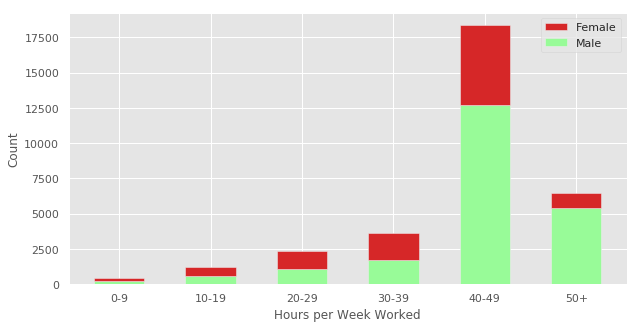

In [51]:
import seaborn 
import matplotlib
#Plots the bar chart
fig = plt.figure(figsize=(10,5))
sns.set(font_scale=1.0)
matplotlib.style.use('ggplot')
categories = ['0-9','10-19','20-29','30-39','40-49','50+']
p1 = plt.bar(categories, malecount, 0.55, color='palegreen')
p2 = plt.bar(categories, femalecount, 0.55, color='#d62728', bottom=malecount)
plt.legend((p2[0],p1[0]),('Female', 'Male'))
plt.xlabel('Hours per Week Worked')
plt.ylabel('Count')
plt.show()   

##Expected Value Calculation
\begin{align}
expected_{i,j} =\frac{{row_{i} \text{total}}(column_{j} \text{total}) } {\text{total observations})}
\end{align}

In [0]:
row_sums = contingency_table.iloc[0:2, 6].values
col_sums = contingency_table.iloc[2, 0:6].values

In [53]:
print(row_sums)
print(col_sums)

[10771 21790]
[ 6462  1246 18336  3667   458  2392]


In [54]:
total = contingency_table.loc['All','All']
total

32561

In [55]:
df.shape

(32561, 16)

In [56]:
import numpy as np
expected = []
for i in range(len(row_sums)):
  expected_row = []
  for column in col_sums:
    expected_val = column*row_sums[i]/total
    expected_row.append(expected_val)
    expected.append(expected_row)

expected = np.array(expected)
print(expected.shape)
print(expected)
  

(12, 6)
[[ 2137.59411566   412.16995793  6065.44811277  1213.02346365
    151.50388502   791.26046497]
 [ 2137.59411566   412.16995793  6065.44811277  1213.02346365
    151.50388502   791.26046497]
 [ 2137.59411566   412.16995793  6065.44811277  1213.02346365
    151.50388502   791.26046497]
 [ 2137.59411566   412.16995793  6065.44811277  1213.02346365
    151.50388502   791.26046497]
 [ 2137.59411566   412.16995793  6065.44811277  1213.02346365
    151.50388502   791.26046497]
 [ 2137.59411566   412.16995793  6065.44811277  1213.02346365
    151.50388502   791.26046497]
 [ 4324.40588434   833.83004207 12270.55188723  2453.97653635
    306.49611498  1600.73953503]
 [ 4324.40588434   833.83004207 12270.55188723  2453.97653635
    306.49611498  1600.73953503]
 [ 4324.40588434   833.83004207 12270.55188723  2453.97653635
    306.49611498  1600.73953503]
 [ 4324.40588434   833.83004207 12270.55188723  2453.97653635
    306.49611498  1600.73953503]
 [ 4324.40588434   833.83004207 12270.5518

In [0]:
## Chi-Squared Statistic with Numpy

# \begin{align}
# \chi^2 = \sum \frac{(obseved_{i}-expected_{i})^2}{(expected_{i})}
# \end{align

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?

###The class labels allowed me to see the the difference between
   the men and women in both the table and the graphic. 

###The ttest break everything down and surprises one to find out that what one thought was evident, was disguised by appearance.

- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?

###The class labels allowed me to see the the difference between
   the men and women in both the table and the graphic. 
   
- What was the most challenging part of this sprint challenge?
  
### I found that looking up the code for each move I made very challenging.  But, all in all, I enjoy working with data.  


Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

## Stretch Goals

Please do not work on anything listed in this section until you have adequately answered everything in the above three sections, all of these stretch goals are **OPTIONAL** but completing them will ensure you a score of 3 on the corresponding sections.

### Section 1 Stretch Goal: (do the following)
- Go above and beyond in conducting thorough data exploration including high quality comments and/or markdown text cells to explain your process/discoveries.

### Section 2 Stretch Goals: (do one of the following)
 - Write a function(s) to automate the execution of t-tests on the continuous variables treating the different class labels as the two samples.

 - Write a funciton(s) to automate the execution of chi^2 tests on all of the different combinations of categorical variables in the dataset.

### Section 3 Stretch Goals: (do one of the following)
- Construct a confidence interval around the mean of one of the continuous variables, communicate the results/interpretation of that confidence interval in the most consumable/easy-to-understand way that you can. (You may choose to include a graph here, but you don't necessarily have to) Communicate the precision of your estimate as clearly as possible.

- Explain the relationship between confidence intervals and T-tests, if possible, use code to demonstrate some important aspects of te